# Fifa Data Insight:

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns,os
from IPython.display import display
df = pd.read_csv("WorldCupMatches.csv")
df.shape

(4572, 20)

In [66]:
sns.set(rc={'figure.figsize':(16.7,4.27)})
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

In [67]:
df.head(5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [68]:
df.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

### Checking the years for which we have the data

In [69]:
df['Year'].unique()

array([1930., 1934., 1938., 1950., 1954., 1958., 1962., 1966., 1970.,
       1974., 1978., 1982., 1986., 1990., 1994., 1998., 2002., 2006.,
       2010., 2014.,   nan])

##### Handling the missing Data

In [70]:
df = df.dropna()
#Fix the Date
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Date'] = pd.DatetimeIndex(df['Datetime']).day
df['Month'] = pd.DatetimeIndex(df['Datetime']).month

In [71]:
np.count_nonzero(df['Year'].unique())

20

In [72]:
#Add Winning Team Name
df['Winning Team'] = df['Home Team Name'][df['Home Team Goals'] > df['Away Team Goals']]
df['Winning Team'].loc[df['Winning Team'].isna()] = df['Away Team Name'][df['Winning Team'].isna()]
df['Winning Team']

C:\Users\ragha\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0           France
1              USA
2       Yugoslavia
3          Romania
4        Argentina
          ...     
847     Costa Rica
848        Germany
849      Argentina
850    Netherlands
851        Germany
Name: Winning Team, Length: 850, dtype: object

In [73]:
#replacing the Germany FR with Germany in Names of Participating Teams
df = df.replace("Germany FR","Germany")

In [74]:
df.sample(10)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Date,Month,Winning Team
833,2014.0,2014-06-29 17:00:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1.0,1.0,Greece,Costa Rica win on penalties (5 - 3),...,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951.0,300186459.0,CRC,GRE,29,6,Greece
125,1958.0,1958-06-17 19:00:00,Group 4,Nya Ullevi,Gothenburg,Soviet Union,1.0,0.0,England,,...,DUSCH Albert (GER),BRONKHORST Jan (NED),SEIPELT Fritz (AUT),220.0,1373.0,URS,ENG,17,6,Soviet Union
107,1958.0,1958-06-08 19:00:00,Group 4,Rimnersvallen,Udevalla,Brazil,3.0,0.0,Austria,,...,GUIGUE Maurice (FRA),DUSCH Albert (GER),BRONKHORST Jan (NED),220.0,1326.0,BRA,AUT,8,6,Brazil
235,1974.0,1974-06-14 19:30:00,Group 2,Westfalenstadion,Dortmund,Zaire,0.0,2.0,Scotland,,...,SCHULENBURG Gerhard (GER),BOSKOVIC Tony (AUS),WEYLAND Hans Joachim (FRG),262.0,2176.0,ZAI,SCO,14,6,Scotland
331,1982.0,1982-06-21 21:00:00,Group 5,La Romareda,Zaragoza,Honduras,1.0,1.0,Northern Ireland,,...,CHAN Thomson Tam Sun (HKG),LABO REVOREDO Enrique (PER),CASARIN Paolo (ITA),293.0,959.0,HON,NIR,21,6,Northern Ireland
200,1970.0,1970-05-31 12:00:00,Group 1,Estadio Azteca,Mexico City,Mexico,0.0,0.0,Soviet Union,,...,TSCHENSCHER Kurt (GER),DUNSTAN Keith (BER),TAYLOR John (ENG),250.0,1902.0,MEX,URS,31,5,Soviet Union
692,2006.0,2006-06-24 17:00:00,Round of 16,"FIFA World Cup Stadium, Munich",Munich,Germany,2.0,0.0,Sweden,,...,SIMON Carlos (BRA),TAVARES Aristeu (BRA),CORONA Ednilson (BRA),97410200.0,97410049.0,GER,SWE,24,6,Germany
29,1934.0,1934-05-31 16:30:00,Quarter-finals,Littorale,Bologna,Austria,2.0,1.0,Hungary,,...,MATTEA Francesco (ITA),ESCARTIN Pedro (ESP),BIRLEM Alfred (GER),418.0,1106.0,AUT,HUN,31,5,Austria
611,2002.0,2002-06-10 18:00:00,Group H,Oita Stadium Big Eye,Oita,Tunisia,1.0,1.0,Belgium,,...,SHIELD Mark (AUS),SMITH Paul (NZL),KOMALEESWARAN Sankar (IND),43950100.0,43950031.0,TUN,BEL,10,6,Belgium
462,1990.0,1990-07-07 20:00:00,Match for third place,Stadio San Nicola,Bari,Italy,2.0,1.0,England,,...,QUINIOU Joel (FRA),HANSAL Mohamed (ALG),ROETHLISBERGER Kurt (SUI),3463.0,162.0,ITA,ENG,7,7,Italy


In [75]:
df.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials',
       'Date', 'Month', 'Winning Team'],
      dtype='object')

In [76]:
dfShort = df.drop(['Referee','Assistant 1','Assistant 2','Datetime','Attendance','Half-time Home Goals','Stadium','City','Half-time Away Goals'],axis=1).copy()
dfShort

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,RoundID,MatchID,Home Team Initials,Away Team Initials,Date,Month,Winning Team
0,1930.0,Group 1,France,4.0,1.0,Mexico,,201.0,1096.0,FRA,MEX,13,7,France
1,1930.0,Group 4,USA,3.0,0.0,Belgium,,201.0,1090.0,USA,BEL,13,7,USA
2,1930.0,Group 2,Yugoslavia,2.0,1.0,Brazil,,201.0,1093.0,YUG,BRA,14,7,Yugoslavia
3,1930.0,Group 3,Romania,3.0,1.0,Peru,,201.0,1098.0,ROU,PER,14,7,Romania
4,1930.0,Group 1,Argentina,1.0,0.0,France,,201.0,1085.0,ARG,FRA,15,7,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,Quarter-finals,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),255953.0,300186488.0,NED,CRC,5,7,Costa Rica
848,2014.0,Semi-finals,Brazil,1.0,7.0,Germany,,255955.0,300186474.0,BRA,GER,8,7,Germany
849,2014.0,Semi-finals,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),255955.0,300186490.0,NED,ARG,9,7,Argentina
850,2014.0,Play-off for third place,Brazil,0.0,3.0,Netherlands,,255957.0,300186502.0,BRA,NED,12,7,Netherlands


Matches in Fifa which went in Extra Time:

In [77]:
ExtraTime = df[df['Win conditions'] != ' ']
ExtraTime

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Date,Month,Winning Team
18,1934.0,1934-05-27 16:30:00,Preliminary round,Stadio Benito Mussolini,Turin,Austria,3.0,2.0,France,Austria win after extra time,...,VAN MOORSEL Johannes (NED),CAIRONI Camillo (ITA),BAERT Louis (BEL),204.0,1104.0,AUT,FRA,27,5,Austria
34,1934.0,1934-06-10 17:30:00,Final,Nazionale PNF,Rome,Italy,2.0,1.0,Czechoslovakia,Italy win after extra time,...,EKLIND Ivan (SWE),BAERT Louis (BEL),IVANCSICS Mihaly (HUN),3490.0,1134.0,ITA,TCH,10,6,Italy
39,1938.0,1938-06-05 17:00:00,First round,Stade V�lodrome,Marseilles,Italy,2.0,1.0,Norway,Italy win after extra time,...,BERANEK Alois (AUT),BOUTOURE D. (FRA),TREHOU D. (FRA),206.0,1179.0,ITA,NOR,5,6,Italy
40,1938.0,1938-06-05 17:30:00,First round,Stade de la Meinau,Strasbourg,Brazil,6.0,5.0,Poland,Brazil win after extra time,...,EKLIND Ivan (SWE),POISSANT Louis (FRA),KISSENBERGER Ernest (FRA),206.0,1150.0,BRA,POL,5,6,Brazil
41,1938.0,1938-06-05 18:30:00,First round,Cavee Verte,Le Havre,Czechoslovakia,3.0,0.0,Netherlands,Czechoslovakia win after extra time,...,LECLERCQ Lucien (FRA),OLIVE D. (FRA),SDEZ Victor (FRA),206.0,1172.0,TCH,NED,5,6,Czechoslovakia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,2014.0,2014-07-01 13:00:00,Round of 16,Arena de Sao Paulo,Sao Paulo,Argentina,1.0,0.0,Switzerland,Argentina win after extra time,...,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),255951.0,300186503.0,ARG,SUI,1,7,Argentina
843,2014.0,2014-07-01 17:00:00,Round of 16,Arena Fonte Nova,Salvador,Belgium,2.0,1.0,USA,Belgium win after extra time,...,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255951.0,300186497.0,BEL,USA,1,7,Belgium
847,2014.0,2014-07-05 17:00:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),...,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC,5,7,Costa Rica
849,2014.0,2014-07-09 17:00:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),...,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG,9,7,Argentina


# Final Matches

In [78]:
FinalMatches = df[df['Stage'] == 'Final']
FinalMatches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Date,Month,Winning Team
17,1930.0,1930-07-30 14:15:00,Final,Estadio Centenario,Montevideo,Uruguay,4.0,2.0,Argentina,,...,LANGENUS Jean (BEL),SAUCEDO Ulises (BOL),CRISTOPHE Henry (BEL),405.0,1087.0,URU,ARG,30,7,Uruguay
34,1934.0,1934-06-10 17:30:00,Final,Nazionale PNF,Rome,Italy,2.0,1.0,Czechoslovakia,Italy win after extra time,...,EKLIND Ivan (SWE),BAERT Louis (BEL),IVANCSICS Mihaly (HUN),3490.0,1134.0,ITA,TCH,10,6,Italy
52,1938.0,1938-06-19 17:00:00,Final,Stade Olympique,Colombes,Italy,4.0,2.0,Hungary,,...,CAPDEVILLE Georges (FRA),WUETHRICH Hans (SUI),KRIST Gustav (TCH),3487.0,1174.0,ITA,HUN,19,6,Italy
100,1954.0,1954-07-04 17:00:00,Final,Wankdorf Stadium,Berne,Germany,3.0,2.0,Hungary,,...,LING William (ENG),ORLANDINI Vincenzo (ITA),GRIFFITHS Benjamin (WAL),3484.0,1278.0,FRG,HUN,4,7,Germany
135,1958.0,1958-06-29 15:00:00,Final,Rasunda Stadium,Solna,Brazil,5.0,2.0,Sweden,,...,GUIGUE Maurice (FRA),DUSCH Albert (GER),GARDEAZABAL Juan (ESP),3482.0,1343.0,BRA,SWE,29,6,Brazil
167,1962.0,1962-06-17 14:30:00,Final,Nacional,Santiago De Chile,Brazil,3.0,1.0,Czechoslovakia,,...,LATYCHEV Nikolaj (URS),HORN Leo (NED),DAVIDSON Bob (SCO),3480.0,1463.0,BRA,TCH,17,6,Brazil
199,1966.0,1966-07-30 15:00:00,Final,Wembley Stadium,London,England,4.0,2.0,Germany,England win after extra time,...,DIENST Gottfried (SUI),BAKHRAMOV Tofik (URS),GALBA Karol (TCH),3478.0,1633.0,ENG,FRG,30,7,England
231,1970.0,1970-06-21 12:00:00,Final,Estadio Azteca,Mexico City,Brazil,4.0,1.0,Italy,,...,GLOECKNER Rudolf (GDR),SCHEURER Ruedi (SUI),COEREZZA Norberto Angel (ARG),3476.0,1765.0,BRA,ITA,21,6,Brazil
269,1974.0,1974-07-07 16:00:00,Final,Olympiastadion,Munich,Netherlands,1.0,2.0,Germany,,...,TAYLOR John (ENG),GONZALEZ ARCHUNDIA Alfonso (MEX),BARRETO RUIZ Ramon (URU),605.0,2063.0,NED,FRG,7,7,Germany
307,1978.0,1978-06-25 15:00:00,Final,El Monumental - Estadio Monumental Antonio Ves...,Buenos Aires,Argentina,3.0,1.0,Netherlands,Argentina win after extra time,...,GONELLA Sergio (ITA),BARRETO RUIZ Ramon (URU),LINEMAYR Erich (AUT),639.0,2198.0,ARG,NED,25,6,Argentina


# Fifa Data Insights
- Team with Most Wins in FIFA
- Top 10 Teams in Fifa (All Years)
- Team that Reached the Finals the most
- Team with Most Goals Year-Wise
- Team with Most Goals (All Year Inclusive)

In [79]:
#List of Teams that Reached Finals
ListofTeams= pd.concat([FinalMatches['Home Team Name'] , FinalMatches['Away Team Name'] ])
ListofTeamsUnique = ListofTeams.drop_duplicates()
ListofTeamsUnique

17            Uruguay
34              Italy
100           Germany
135            Brazil
199           England
269       Netherlands
307         Argentina
34     Czechoslovakia
52            Hungary
135            Sweden
579            France
771             Spain
dtype: object

In [80]:
#List of teams Reaching Finals,
ListofTeams.value_counts()

Germany           9
Brazil            6
Argentina         6
Italy             6
Netherlands       3
France            2
Czechoslovakia    2
Hungary           2
Sweden            1
Uruguay           1
Spain             1
England           1
dtype: int64

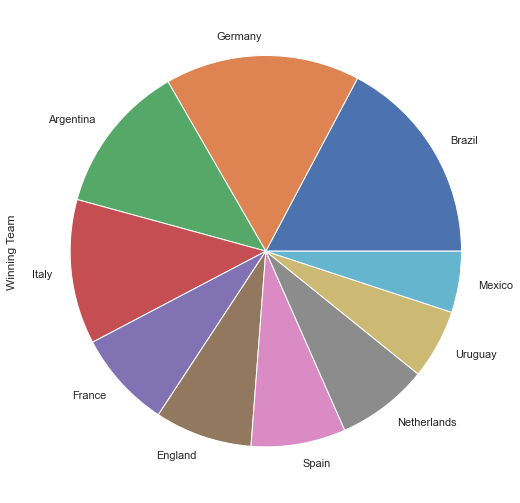

In [81]:
topten_teams = dfShort['Winning Team'].value_counts().nlargest(10).plot(kind='pie')

Above you can see the list of teams that reached Fifa Tournament's Final Stage, and how many times was that done. as we can see clealy, Germany was the Best Performing team as they reached Finals with a success rate of 9/20.

In [82]:
FinalsWinData = pd.DataFrame(ListofTeams.value_counts(),columns=['Count'])
FinalsWinData['Wins'] = dfShort['Winning Team'][df['Stage'] == 'Final'].value_counts()
FinalsWinData.fillna(0,inplace=True)
FinalsWinData['Wins'] = FinalsWinData['Wins'].astype('int32')
FinalsWinData

,Count,Wins
Germany,9,5
Brazil,6,4
Argentina,6,2
Italy,6,4
Netherlands,3,0
France,2,2
Czechoslovakia,2,0
Hungary,2,0
Sweden,1,0
Uruguay,1,1


<AxesSubplot:ylabel='Wins'>

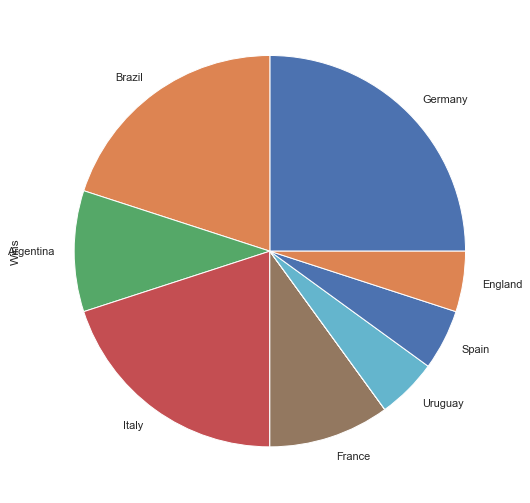

In [83]:
FinalsWinData['Wins'].plot(kind="pie")

In [84]:
dfCompact = df[['Year','Home Team Name','Home Team Goals','Away Team Name','Away Team Goals']]
TeamList = pd.concat([dfCompact['Home Team Name'],dfCompact['Away Team Name']])
GoalList = pd.concat([dfCompact['Home Team Goals'],dfCompact['Away Team Goals']])
YearList = pd.concat([df["Year"],df['Year']])

In [85]:
index = [(Year,Team) for Year,Team in zip(YearList,TeamList)]
index = pd.MultiIndex.from_tuples(index)
df = pd.DataFrame( list(GoalList) ,index = index,columns=['Goals'])
df.index = df.index.set_names(['Year','Team'])

In [90]:
df =df.sort_values(by=['Year',"Goals"],ascending=False).reset_index(level=[1])
HighestGoalEachSeason = df.groupby(by="Year").max()

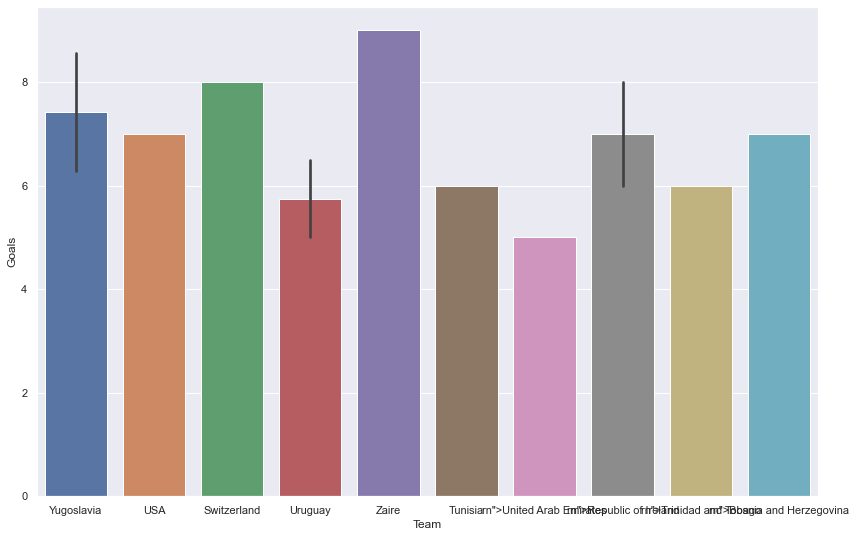

In [91]:
bp = sns.barplot(x="Team",y="Goals",data=HighestGoalEachSeason)

Above Table Shows the team with Most goals in each Fifa tournament ever held. duplicates are hidden :p

## Countries with Most Goals (All Seasons Inclusive):

In [92]:
HomeTeamGoals = dfCompact[['Home Team Name','Home Team Goals']].dropna()
HomeTeamGoals.columns = ['Countries','Goals']
AwayTeamGoals = dfCompact[['Away Team Name','Away Team Goals']].dropna()
AwayTeamGoals.columns = HomeTeamGoals.columns
totalGoals = pd.concat([HomeTeamGoals,AwayTeamGoals],axis='rows',ignore_index=True)
totalGoals = totalGoals.groupby('Countries',as_index=False).sum()
totalGoals = totalGoals.sort_values('Goals',ascending = False)
totalGoals

,Countries,Goals
28,Germany,231.0
7,Brazil,225.0
2,Argentina,133.0
38,Italy,128.0
26,France,108.0
...,...,...
21,Dutch East Indies,0.0
12,China PR,0.0
10,Canada,0.0
76,Zaire,0.0


<AxesSubplot:xlabel='Countries', ylabel='Goals'>

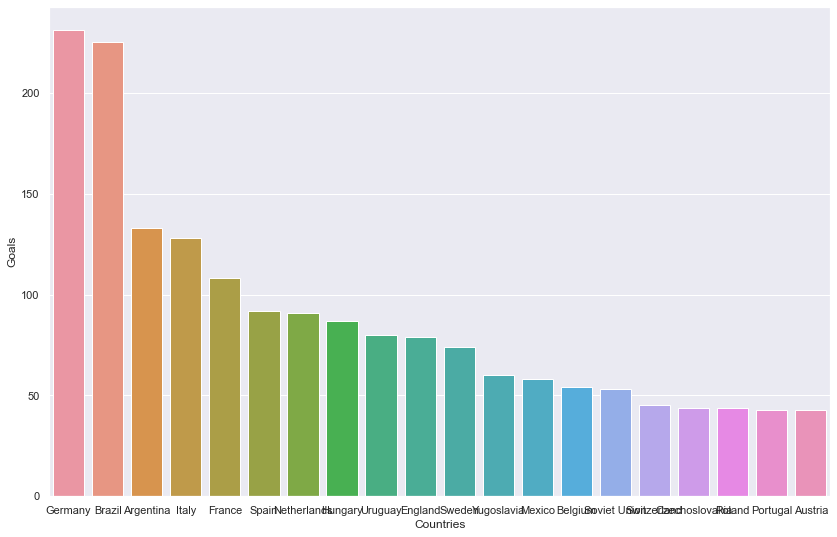

In [93]:
sns.barplot(x="Countries",y="Goals",data = totalGoals[:20])